In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install fastdtw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=517915 sha256=f8672c6b3419b97f55feffc1f1985f032388adf6065335ac13db645b379ac072
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn import preprocessing
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [4]:
df = pd.read_excel("/content/drive/MyDrive/OLAP/Data/BOOK_20k.xlsx", usecols=['Language','Rating'])
df = df.dropna()
df

,Rating,Language
9,4.01,eng
11,3.66,eng
13,4.15,fre
28,4.03,en-US
44,3.94,eng
...,...,...
19963,4.04,eng
19964,5.00,eng
19965,4.02,eng
19967,3.78,eng


In [5]:
df['Language'].nunique()

21

In [6]:
df.dtypes

Rating      float64
Language     object
dtype: object

In [7]:
for dataset in [df]:
  dataset['Rating'] = dataset['Rating'].astype(int)
  dataset.loc[(dataset['Rating'] >= 0.00) & (dataset['Rating'] <= 1.00), 'Rating'] = 0
  dataset.loc[(dataset['Rating'] > 1.00) & (dataset['Rating'] <= 2.00), 'Rating'] = 1
  dataset.loc[(dataset['Rating'] > 2.00) & (dataset['Rating'] <= 3.00), 'Rating'] = 2
  dataset.loc[(dataset['Rating'] > 3.00) & (dataset['Rating'] <= 4.00), 'Rating'] = 3
  dataset.loc[(dataset['Rating'] > 4.00), 'Rating'] = 4

In [8]:
df['Rating'].value_counts()

2    2077
3    1360
0      73
1      46
4      30
Name: Rating, dtype: int64

# Random Forest

In [25]:
# Sử dụng phương thức LabelEncoder để chuyển đổi dữ liệu chữ thành số

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Language'] = le.fit_transform(df['Language'])

In [26]:
features = df.drop('Rating', axis=1)
labels = df['Rating']

In [27]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [28]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Accuracy_score
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy_rf:", accuracy_rf)

Accuracy_rf: 0.5613382899628253


In [29]:
#Model Accuracy
train_accuracy_rf = accuracy_score(y_train, y_train_pred)
test_accuracy_rf = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", train_accuracy_rf)
print("Test Accuracy:", test_accuracy_rf)
print("Report: ",classification_report(y_test, y_pred))

Training Accuracy: 0.5908366533864542
Test Accuracy: 0.5613382899628253
Report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.00      0.00      0.00        11
           2       0.56      0.99      0.72       605
           3       0.50      0.01      0.01       427
           4       0.00      0.00      0.00         6

    accuracy                           0.56      1076
   macro avg       0.21      0.20      0.15      1076
weighted avg       0.52      0.56      0.41      1076



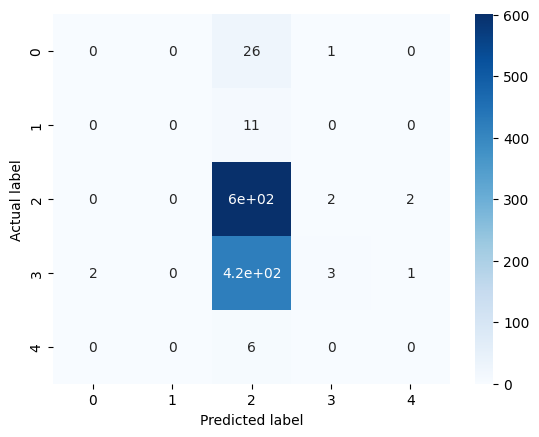

In [30]:
import sklearn.metrics as metrics
# Confusion matrix
cm_rf = metrics.confusion_matrix(y_test, y_test_pred)

# Heatmap
sns.heatmap(cm_rf, annot=True, cmap="Blues")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
title = 'Random Forest Accuracy score: {0}'.format(accuracy_rf)
plt.show()

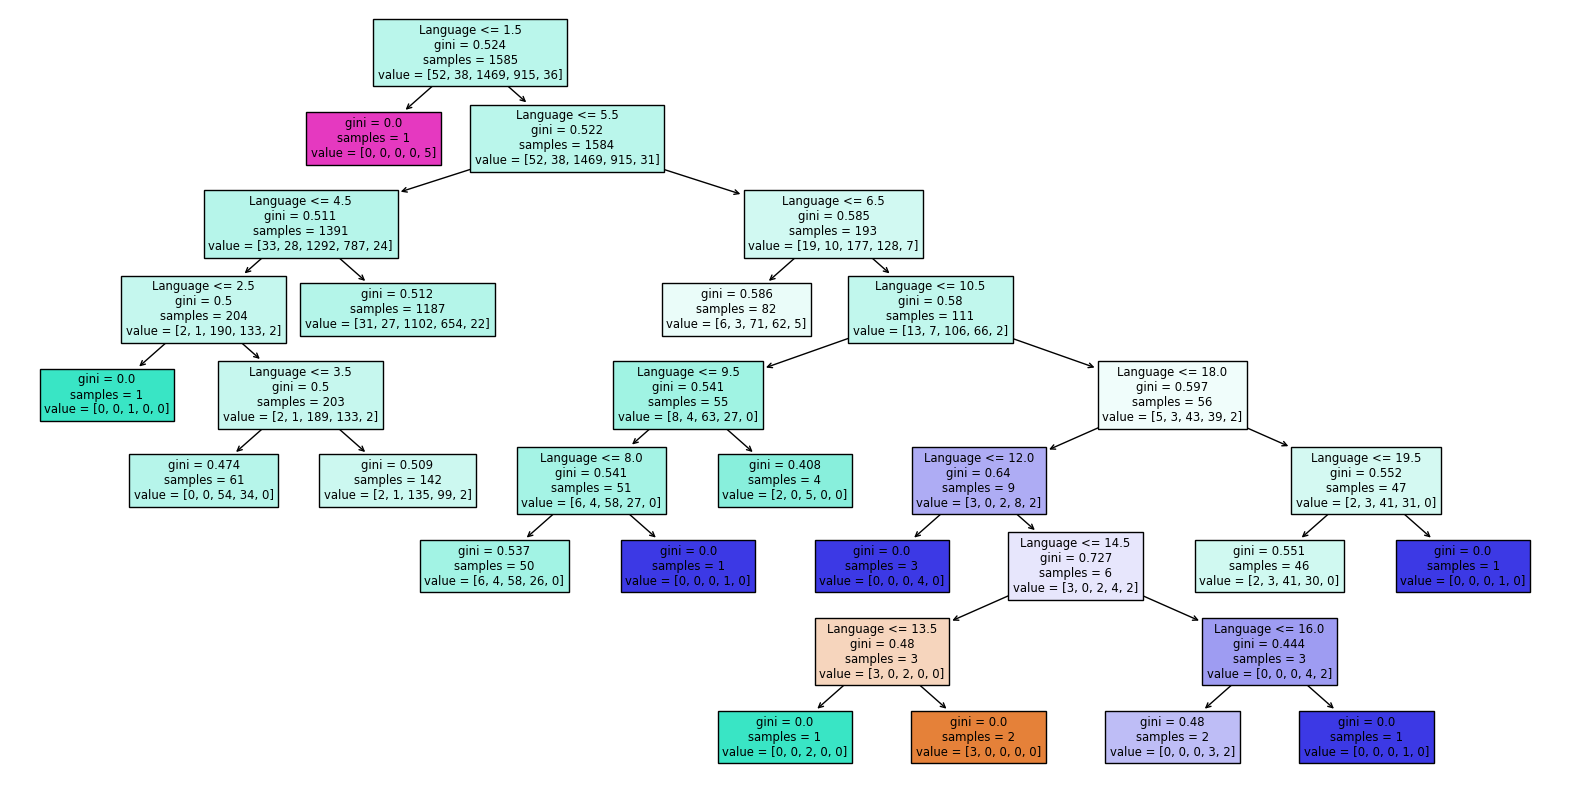

In [31]:
#Tree plot
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], feature_names = features.columns, filled=True)
plt.show()

In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
import re

df = pd.read_excel("/content/drive/MyDrive/OLAP/Data/BOOK_20k.xlsx", usecols=['Language','Rating'])
df = df.dropna()

for dataset in [df]:
  dataset['Rating'] = dataset['Rating'].astype(int)
  dataset.loc[(dataset['Rating'] >= 0.00) & (dataset['Rating'] <= 1.00), 'Rating'] = 0
  dataset.loc[(dataset['Rating'] > 1.00) & (dataset['Rating'] <= 2.00), 'Rating'] = 1
  dataset.loc[(dataset['Rating'] > 2.00) & (dataset['Rating'] <= 3.00), 'Rating'] = 2
  dataset.loc[(dataset['Rating'] > 3.00) & (dataset['Rating'] <= 4.00), 'Rating'] = 3
  dataset.loc[(dataset['Rating'] > 4.00), 'Rating'] = 4

# Use LabelEncoder to convert textual data to numerical
le = LabelEncoder()
df['Language_encoded'] = le.fit_transform(df['Language'])

features = df.drop(['Rating', 'Language'], axis=1)
labels = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Build the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Create a new workbook
workbook = Workbook()

# Create a sheet for the original data
sheet1 = workbook.active
sheet1.title = 'Original Data'
for row in dataframe_to_rows(df.drop('Language_encoded', axis=1), index=False, header=True):
    sheet1.append(row)

# Create a sheet for each language value
disciplines = df['Language'].unique()
for i, discipline in enumerate(disciplines, start=1):
    # Replace '/' with '_' in the sheet name
    discipline_cleaned = discipline.replace('/', '_')
    sheet = workbook.create_sheet(title=str(i))  # Use the order as the sheet name
    filtered_df = df[df['Language'] == discipline].drop('Language_encoded', axis=1)
    for row in dataframe_to_rows(filtered_df, index=False, header=True):
        sheet.append(row)

# Save the workbook to an Excel file
workbook.save('RandomForest_results.xlsx')

# Decision Tree CART

In [ ]:
clf = DecisionTreeClassifier(criterion="gini", random_state=0)

clf.fit(X_train, y_train)

train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

#Model Accuracy, how often is the classifre correct?
train_accuracy = metrics.accuracy_score(y_train, train_pred)
test_accuracy = metrics.accuracy_score(y_test, test_pred)

print("Accuracy on training set:", train_accuracy)
print("Accuracy on test set:", test_accuracy)
print("Report:", metrics.classification_report(y_test, test_pred))

Accuracy on training set: 0.5908366533864542
Accuracy on test set: 0.5622676579925651
Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.00      0.00      0.00        11
           2       0.56      0.99      0.72       605
           3       0.50      0.01      0.02       427
           4       0.00      0.00      0.00         6

    accuracy                           0.56      1076
   macro avg       0.21      0.20      0.15      1076
weighted avg       0.52      0.56      0.41      1076



Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.5622676579925651')

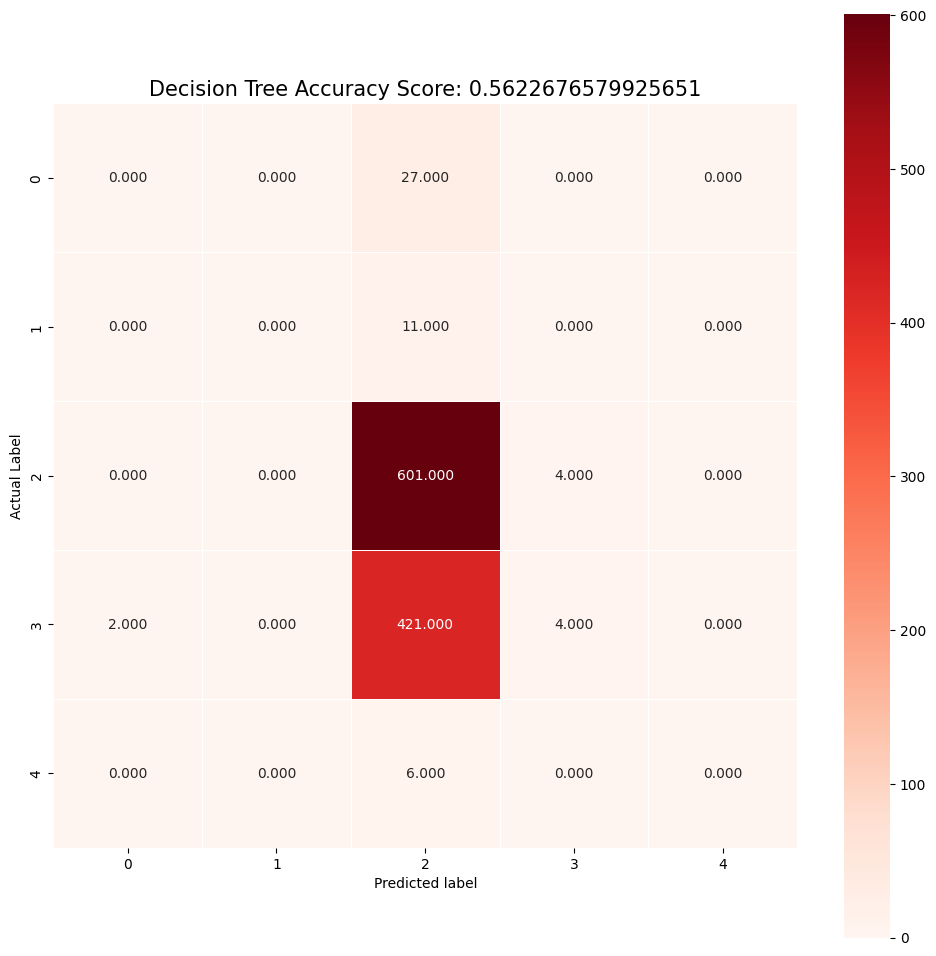

In [ ]:
#Confusion Metric
cm = metrics.confusion_matrix(y_test, test_pred)

#Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Reds')

plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
title = 'Decision Tree Accuracy Score: {0}'.format(test_accuracy)
plt.title(title, size=15)

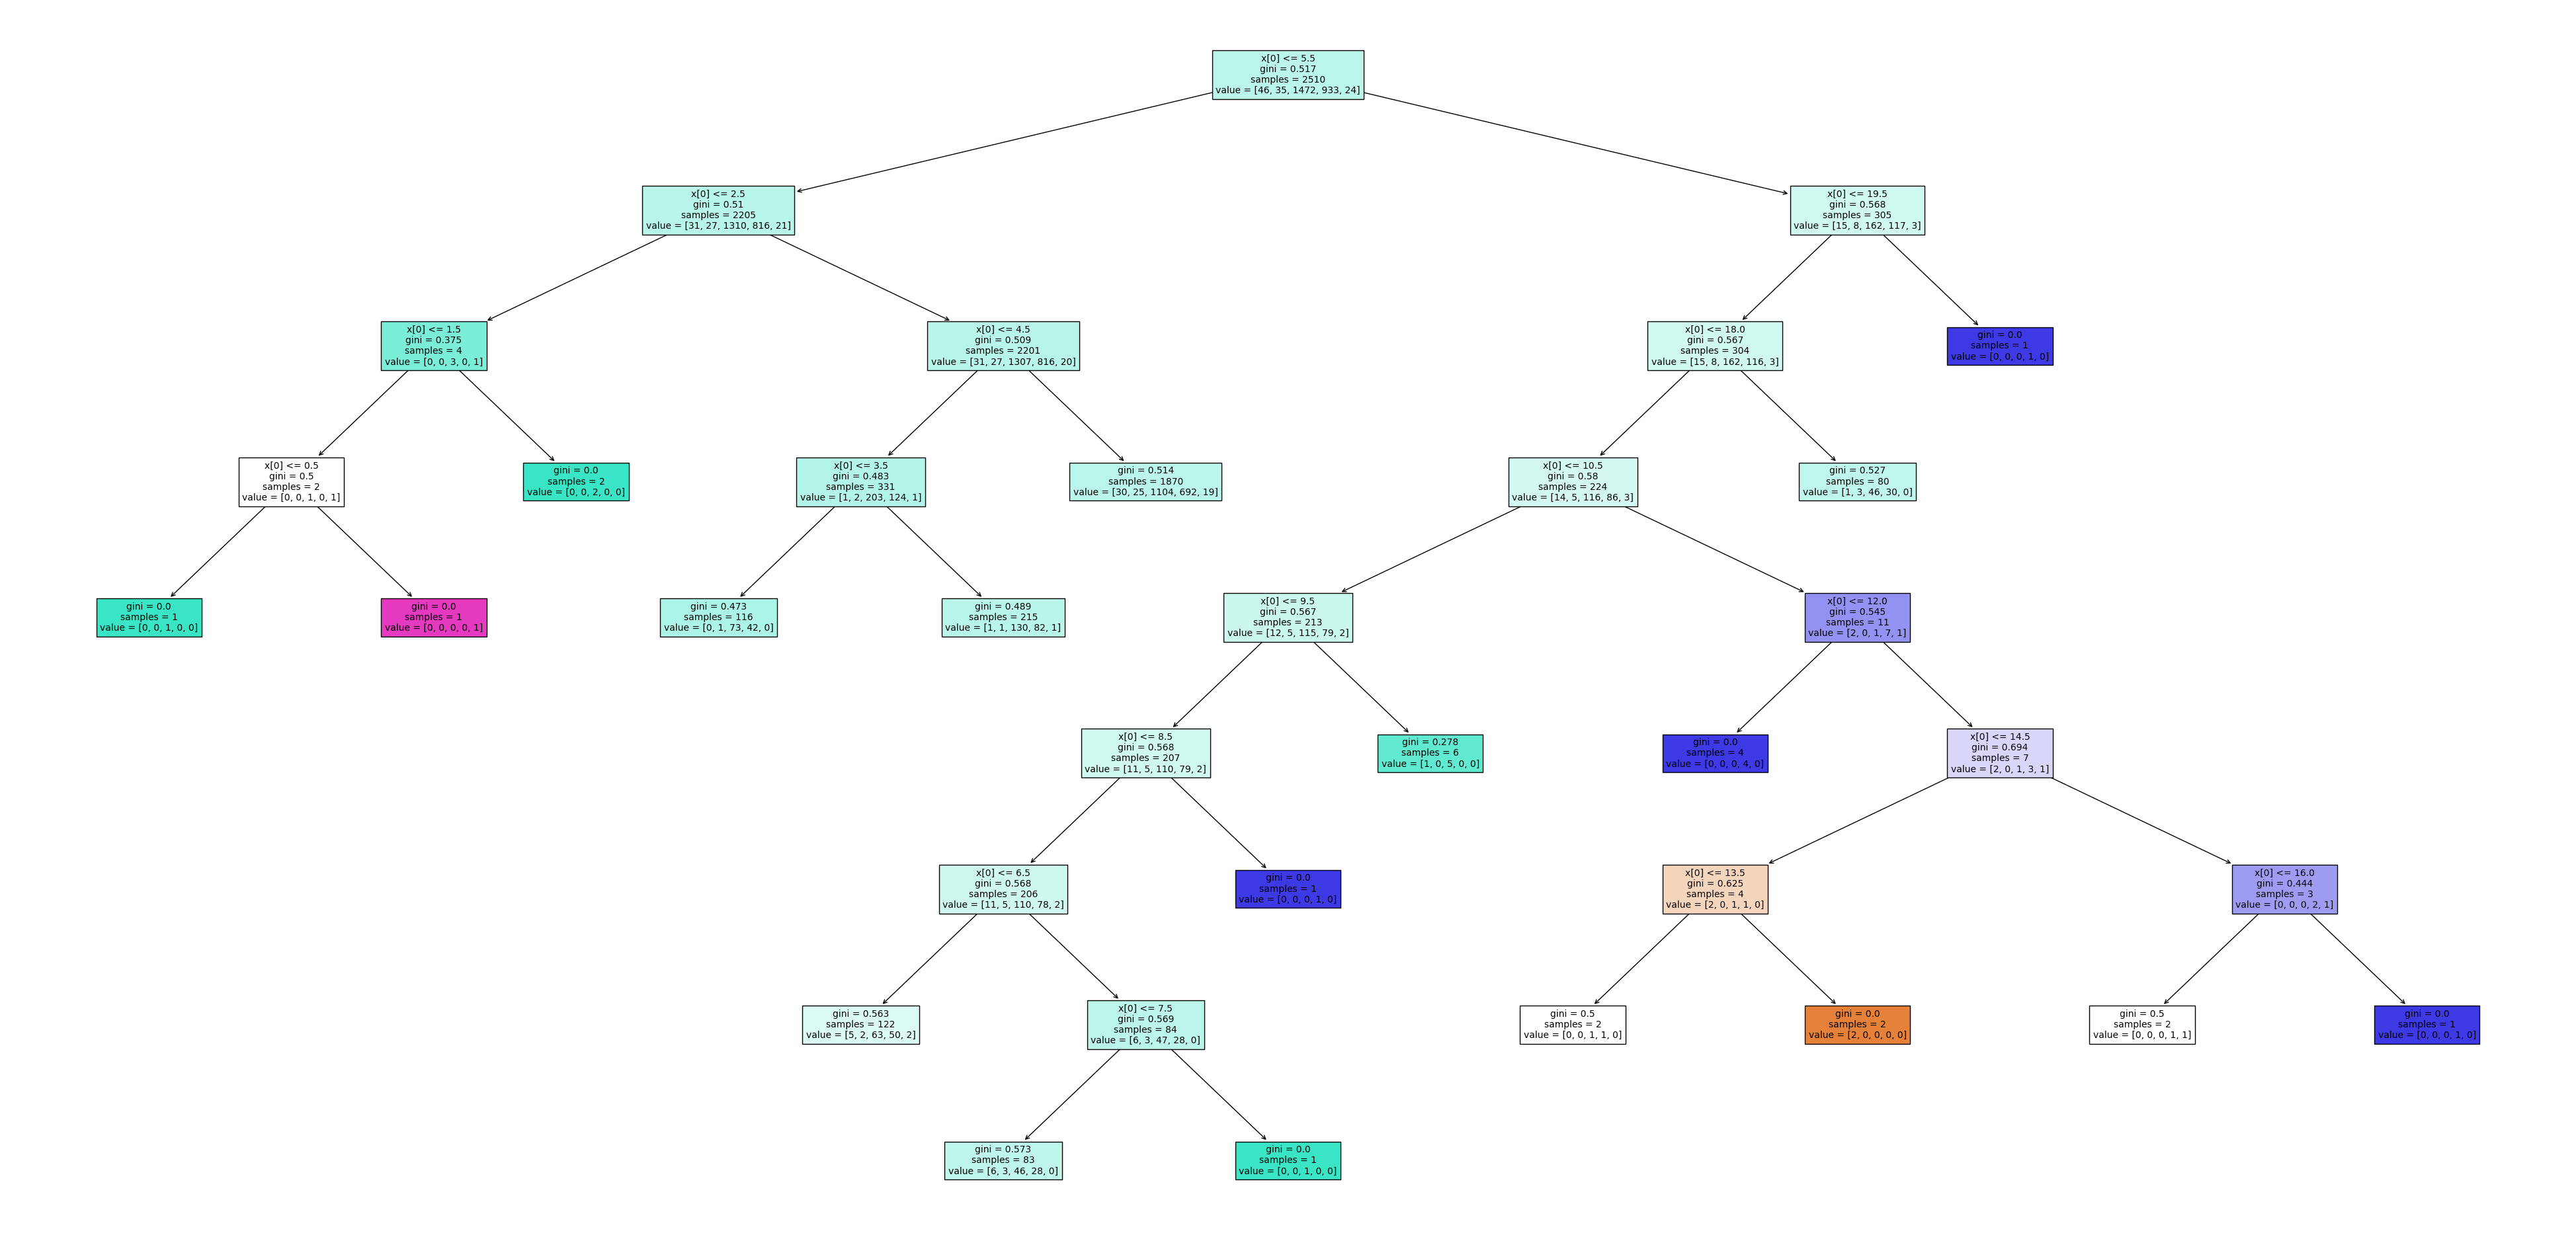

In [ ]:
fig, ax = plt.subplots(figsize=(50,24))
plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree_gini',dpi=100)
plt.show()

In [38]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

df = pd.read_excel("/content/drive/MyDrive/OLAP/Data/BOOK_20k.xlsx", usecols=['Language', 'Rating'])
df = df.dropna()

for dataset in [df]:
    dataset['Rating'] = dataset['Rating'].astype(int)
    dataset.loc[(dataset['Rating'] >= 0.00) & (dataset['Rating'] <= 1.00), 'Rating'] = 0
    dataset.loc[(dataset['Rating'] > 1.00) & (dataset['Rating'] <= 2.00), 'Rating'] = 1
    dataset.loc[(dataset['Rating'] > 2.00) & (dataset['Rating'] <= 3.00), 'Rating'] = 2
    dataset.loc[(dataset['Rating'] > 3.00) & (dataset['Rating'] <= 4.00), 'Rating'] = 3
    dataset.loc[(dataset['Rating'] > 4.00), 'Rating'] = 4

# Use LabelEncoder to convert textual data to numerical
le = LabelEncoder()
df['Language_encoded'] = le.fit_transform(df['Language'])

features = df.drop(['Rating', 'Language'], axis=1)
labels = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Build the Decision Tree model with Gini Index
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Create a new workbook
workbook = Workbook()

# Create a sheet for the original data
sheet1 = workbook.active
sheet1.title = 'Original Data'
for row in dataframe_to_rows(df.drop('Language_encoded', axis=1), index=False, header=True):
    sheet1.append(row)

# Create a sheet for each language value
disciplines = df['Language'].unique()
for i, discipline in enumerate(disciplines, start=1):
    # Replace '/' with '_' in the sheet name
    discipline_cleaned = discipline.replace('/', '_')
    sheet = workbook.create_sheet(title=str(i))  # Use the order as the sheet name
    filtered_df = df[df['Language'] == discipline].drop('Language_encoded', axis=1)
    for row in dataframe_to_rows(filtered_df, index=False, header=True):
        sheet.append(row)

# Save the workbook to an Excel file
workbook.save('DecisionTree_results.xlsx')